In [42]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame()

In [11]:
df['X1'] =    [1,2,3,4,5,6,6,7,9,9]
df['X2'] =    [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [13]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [29]:
df['weights'] = 1/df.shape[0]

In [31]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [37]:

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

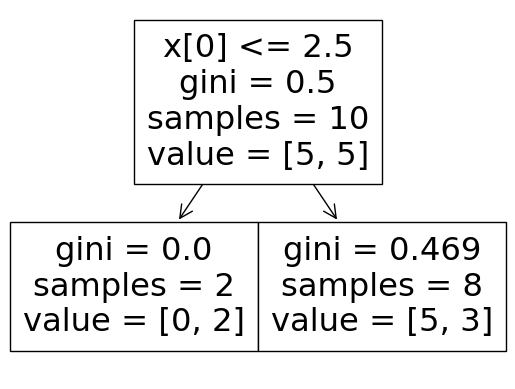

In [39]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [44]:
df['y_pred'] = dt1.predict(X)

In [46]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [48]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [50]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [52]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [55]:

df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [58]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [60]:
df['normalized_weights'] = df['updated_weights']/np.sum(df['updated_weights'])

In [62]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [64]:
df['normalized_weights'].sum()

1.0

In [67]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [70]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [73]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [75]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [77]:
index_values = create_new_dataset(df)

index_values

[4, 8, 3, 3, 0, 6, 5, 9, 5, 5]

In [79]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [81]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [83]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

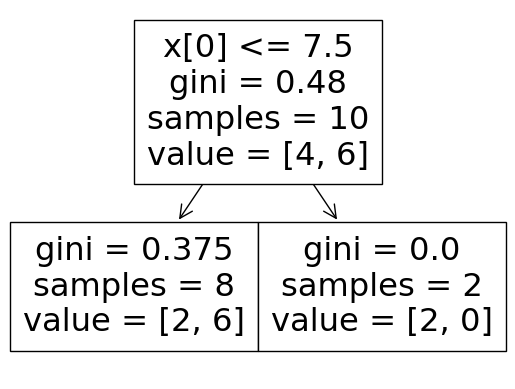

In [85]:
plot_tree(dt2)

In [87]:
second_df['y_pred'] = dt2.predict(X)

In [89]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [ ]:
second_df['updated']